In [43]:
import numpy as np
import matplotlib.pyplot as plt

from dedalus import public as de
from dedalus.extras.plot_tools import quad_mesh, pad_limits

import logging
logger = logging.getLogger(__name__)

In [44]:
# Bases and domain
x_basis = de.Fourier('x', 64, interval=(-10,10), dealias=3/2)
y_basis = de.Fourier('y', 64, interval=(-10,10), dealias=3/2)
domain = de.Domain([x_basis, y_basis], np.float64)

# Problem

#D*dx(cx) + dx(D)*cx + D*dy(cy) + dy(D)*cy - dt(c)

problem = de.IVP(domain, variables=['D', 'c', 'cx', 'cy'])
problem.add_equation("dt(c) = D*dx(cx) + dx(D)*cx + D*dy(cy) + dy(D)*cy")
problem.add_equation("cx - dx(c) = 0")
problem.add_equation("cy - dy(c) = 0")
problem.add_equation("dt(D) = 0")

# Build solver
solver = problem.build_solver(de.timesteppers.SBDF2)
solver.stop_wall_time = 6000000
solver.stop_iteration = 5000

2019-09-08 23:04:29,711 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 4.2e+01/s
2019-09-08 23:04:29,772 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 1s, Rate: 4.7e+01/s
2019-09-08 23:04:29,851 pencil 0/1 INFO :: Building pencil matrix 8/32 (~25%) Elapsed: 0s, Remaining: 0s, Rate: 4.9e+01/s
2019-09-08 23:04:29,929 pencil 0/1 INFO :: Building pencil matrix 12/32 (~38%) Elapsed: 0s, Remaining: 0s, Rate: 4.9e+01/s
2019-09-08 23:04:30,008 pencil 0/1 INFO :: Building pencil matrix 16/32 (~50%) Elapsed: 0s, Remaining: 0s, Rate: 5.0e+01/s
2019-09-08 23:04:30,086 pencil 0/1 INFO :: Building pencil matrix 20/32 (~62%) Elapsed: 0s, Remaining: 0s, Rate: 5.0e+01/s
2019-09-08 23:04:30,167 pencil 0/1 INFO :: Building pencil matrix 24/32 (~75%) Elapsed: 0s, Remaining: 0s, Rate: 5.0e+01/s
2019-09-08 23:04:30,303 pencil 0/1 INFO :: Building pencil matrix 28/32 (~88%) Elapsed: 1s, Remaining: 0s, Rate: 4.5e+01/s
2019-09-08 23:04:30,

In [45]:
# Initial conditions
x = domain.grid(0)
y = domain.grid(1)
c = solver.state['c']
cx = solver.state['cx']
cy = solver.state['cy']
D = solver.state['D']

In [46]:
c['g'] = x
c.differentiate(0, out=cx)
c.differentiate(1, out=cy)
D['g'] = 1

In [47]:
# Store data for final plot
solver.stop_wall_time = 600000
c.set_scales(1)
c_list = [np.copy(c['g'])]
t_list = [solver.sim_time]

# Main loop
dt = 2e-3
while solver.ok:
    solver.step(dt)
    if solver.iteration % 20 == 0:
        c.set_scales(1)
        c_list.append(np.copy(c['g']))
        t_list.append(solver.sim_time)
    if solver.iteration % 100 == 0:
        logger.info('Iteration: %i, Time: %e, dt: %e' %(solver.iteration, solver.sim_time, dt))

2019-09-08 23:04:36,315 __main__ 0/1 INFO :: Iteration: 100, Time: 2.000000e-01, dt: 2.000000e-03
2019-09-08 23:04:36,871 __main__ 0/1 INFO :: Iteration: 200, Time: 4.000000e-01, dt: 2.000000e-03
2019-09-08 23:04:37,352 __main__ 0/1 INFO :: Iteration: 300, Time: 6.000000e-01, dt: 2.000000e-03
2019-09-08 23:04:37,801 __main__ 0/1 INFO :: Iteration: 400, Time: 8.000000e-01, dt: 2.000000e-03
2019-09-08 23:04:38,190 __main__ 0/1 INFO :: Iteration: 500, Time: 1.000000e+00, dt: 2.000000e-03
2019-09-08 23:04:38,589 __main__ 0/1 INFO :: Iteration: 600, Time: 1.200000e+00, dt: 2.000000e-03
2019-09-08 23:04:39,004 __main__ 0/1 INFO :: Iteration: 700, Time: 1.400000e+00, dt: 2.000000e-03
2019-09-08 23:04:39,440 __main__ 0/1 INFO :: Iteration: 800, Time: 1.600000e+00, dt: 2.000000e-03
2019-09-08 23:04:39,821 __main__ 0/1 INFO :: Iteration: 900, Time: 1.800000e+00, dt: 2.000000e-03
2019-09-08 23:04:40,202 __main__ 0/1 INFO :: Iteration: 1000, Time: 2.000000e+00, dt: 2.000000e-03
2019-09-08 23:04:40

[[-9.84375 -9.84375 -9.84375 ... -9.84375 -9.84375 -9.84375]
 [-9.84375 -9.84375 -9.84375 ... -9.84375 -9.84375 -9.84375]
 [-9.21875 -9.21875 -9.21875 ... -9.21875 -9.21875 -9.21875]
 ...
 [ 8.90625  8.90625  8.90625 ...  8.90625  8.90625  8.90625]
 [ 9.53125  9.53125  9.53125 ...  9.53125  9.53125  9.53125]
 [ 9.53125  9.53125  9.53125 ...  9.53125  9.53125  9.53125]]
[[-4.38914937 -4.38914937 -4.38914937 ... -4.38914937 -4.38914937
  -4.38914937]
 [-8.89873446 -8.89873446 -8.89873446 ... -8.89873446 -8.89873446
  -8.89873446]
 [-9.32441838 -9.32441838 -9.32441838 ... -9.32441838 -9.32441838
  -9.32441838]
 ...
 [ 9.01191838  9.01191838  9.01191838 ...  9.01191838  9.01191838
   9.01191838]
 [ 8.58623446  8.58623446  8.58623446 ...  8.58623446  8.58623446
   8.58623446]
 [ 4.07664937  4.07664937  4.07664937 ...  4.07664937  4.07664937
   4.07664937]]


"\nplt.figure()\nplt.pcolormesh(X, Y, c_array[0], cmap='RdBu_r')\nplt.axis(pad_limits(X, Y))\nplt.colorbar()\nplt.xlabel('x')\nplt.ylabel('y')\nplt.title('Initial')\nplt.savefig('initial.png')\nplt.figure()\nplt.pcolormesh(X, Y, c_array[-1], cmap='RdBu_r')\nplt.axis(pad_limits(X, Y))\nplt.colorbar()\nplt.xlabel('x')\nplt.ylabel('y')\nplt.title('Final')\nplt.savefig('Final.png')\n"

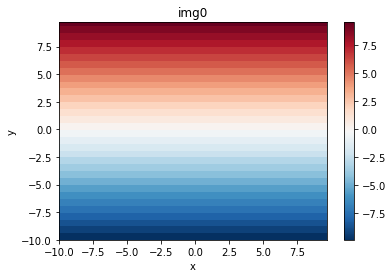

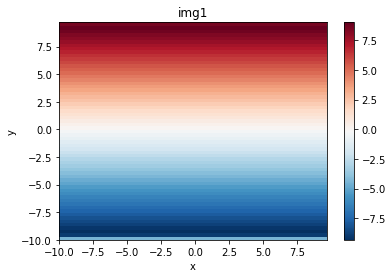

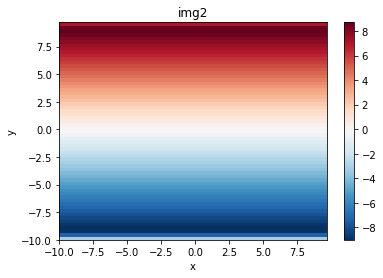

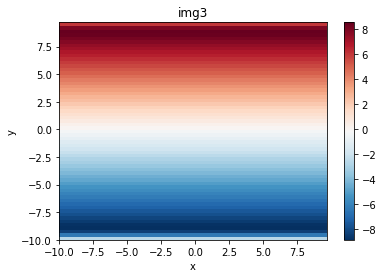

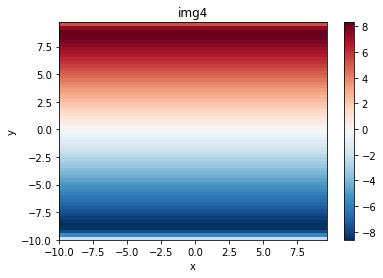

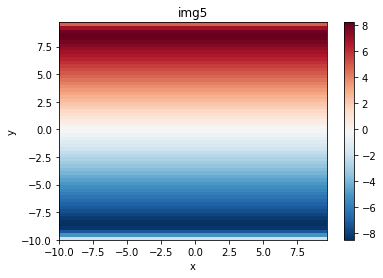

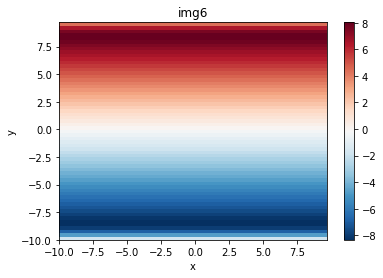

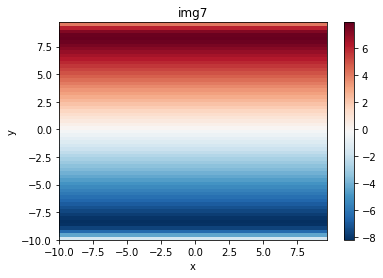

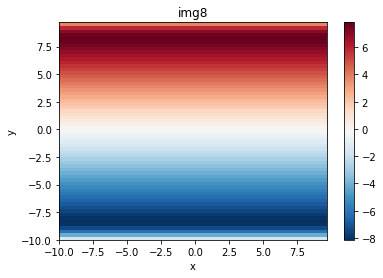

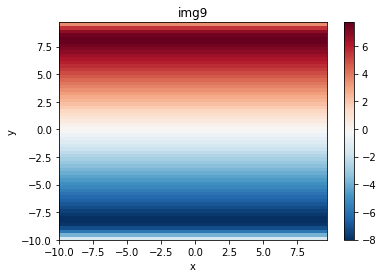

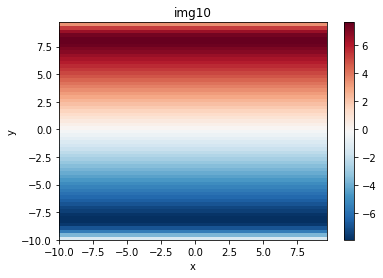

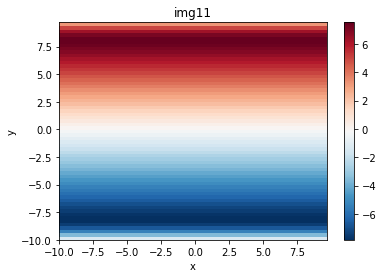

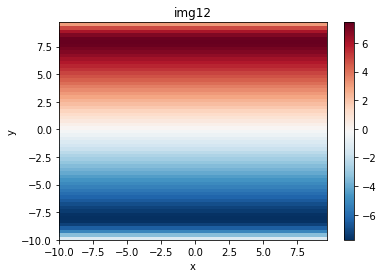

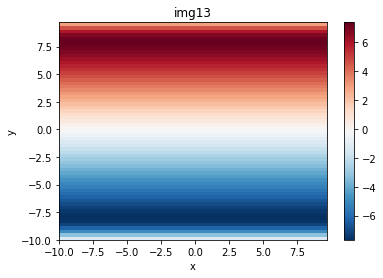

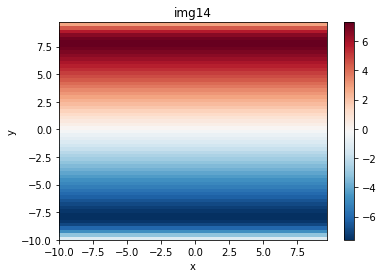

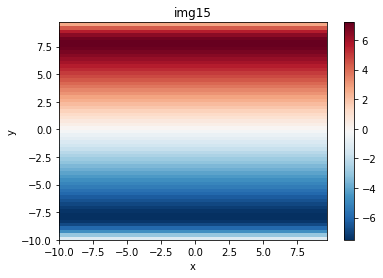

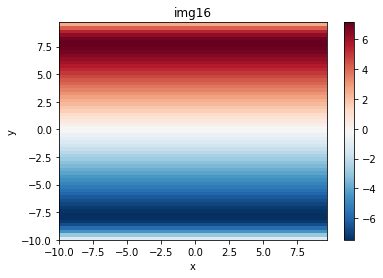

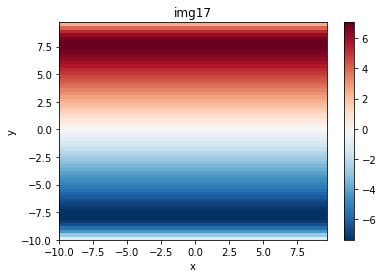

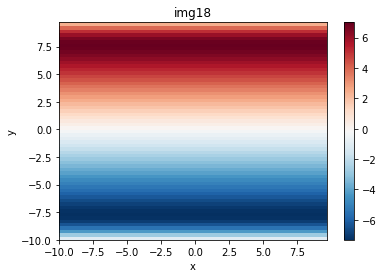

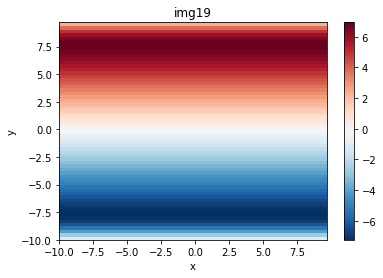

In [48]:
# Create space-time plot
c_array = np.array(c_list)
t_array = np.array(t_list)
print(c_array[0])
print(c_array[1])
#xmesh, ymesh = quad_mesh(x=x, y=y)
X, Y = np.meshgrid(x, y)
for i in range(0,20):
    plt.figure()
    plt.pcolormesh(X, Y, c_array[i], cmap='RdBu_r')
    plt.axis(pad_limits(X, Y))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('img'+str(i))
    plt.savefig('img'+str(i)+'.png')
"""
plt.figure()
plt.pcolormesh(X, Y, c_array[0], cmap='RdBu_r')
plt.axis(pad_limits(X, Y))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial')
plt.savefig('initial.png')
plt.figure()
plt.pcolormesh(X, Y, c_array[-1], cmap='RdBu_r')
plt.axis(pad_limits(X, Y))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final')
plt.savefig('Final.png')
"""